<a href="https://colab.research.google.com/github/proshanta000/langgraph_l/blob/main/langgraph_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith = userdata.get('LANGSMITH_API_KEY')


In [ ]:
import os

os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph_L"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7df5ad6c5820>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7df5ad5a3ef0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start building chatbot using Langgraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class state(TypedDict):
  # Messages have the type "list". The  "add_messages" function
  # in the annotation defines how this state key should be updated
  #(in this case, it appends messages to the list , rather than overwriting them)
  messages:Annotated[list, add_messages]

graph_builder=StateGraph(state)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:state):
  return{"messages":llm.invoke(state["messages"])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [ ]:
graph = graph_builder.compile()

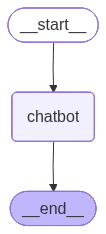

In [ ]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ("quit","q"):
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant:', value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content="Hello. What's on your mind?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 36, 'total_tokens': 45, 'completion_time': 0.018838284, 'prompt_time': 0.002942531, 'queue_time': 0.036336034, 'total_time': 0.021780815}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_d834565e05', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--04108bd5-3099-44b1-9ecb-b79a51d03d35-0', usage_metadata={'input_tokens': 36, 'output_tokens': 9, 'total_tokens': 45})}])
content="Hello. What's on your mind?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 36, 'total_tokens': 45, 'completion_time': 0.018838284, 'prompt_time': 0.002942531, 'queue_time': 0.036336034, 'total_time': 0.021780815}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_d834565e05', 'service_tier': 'on_demand', 'finish_reason':